In [5]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import *

In [10]:
df=pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
df.columns = df.columns.str.replace(' ', '')
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [13]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [14]:
df.shape

(32561, 15)

In [15]:
df = df.drop_duplicates(keep = 'first')
df.shape

(32537, 15)

In [16]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [17]:
df['age'].nunique()

73

In [18]:
df['workclass'].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [19]:
df.isnull().sum(axis = 0)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [20]:
df[df['native.country'] == '?'].shape

(582, 15)

In [21]:
for i in df.columns:
    t = df[i].value_counts()
    index = list(t.index)
    print ("Il y'a dans la colone", i,)
    for i in index:
        temp = 0
        if i == '?':
            print (t['?'])
            temp = 1
            break
    if temp == 0:
        print ("0")

Il y'a dans la colone age
0
Il y'a dans la colone workclass
1836
Il y'a dans la colone fnlwgt
0
Il y'a dans la colone education
0
Il y'a dans la colone education.num
0
Il y'a dans la colone marital.status
0
Il y'a dans la colone occupation
1843
Il y'a dans la colone relationship
0
Il y'a dans la colone race
0
Il y'a dans la colone sex
0
Il y'a dans la colone capital.gain
0
Il y'a dans la colone capital.loss
0
Il y'a dans la colone hours.per.week
0
Il y'a dans la colone native.country
582
Il y'a dans la colone income
0


In [22]:
df= df[df.occupation != '?']

df['occupation'].value_counts()

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

In [23]:
df.at[df['age'].idxmin(),'age']

17

L'age maximum est 90
L'age minimum est 17


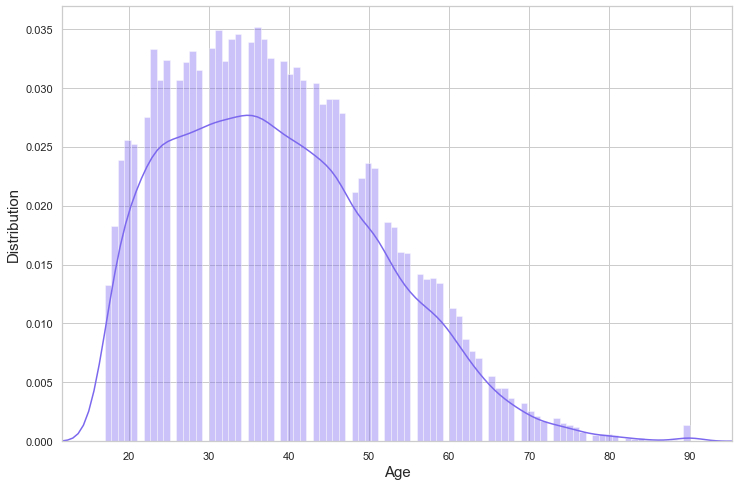

In [24]:
plt.rcParams['figure.figsize'] = [12, 8]
sns.set(style = 'whitegrid')

sns.distplot(df['age'], bins = 90, color = 'mediumslateblue')
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.margins(x = 0)

print ("L'age maximum est", df['age'].max())
print ("L'age minimum est", df['age'].min())

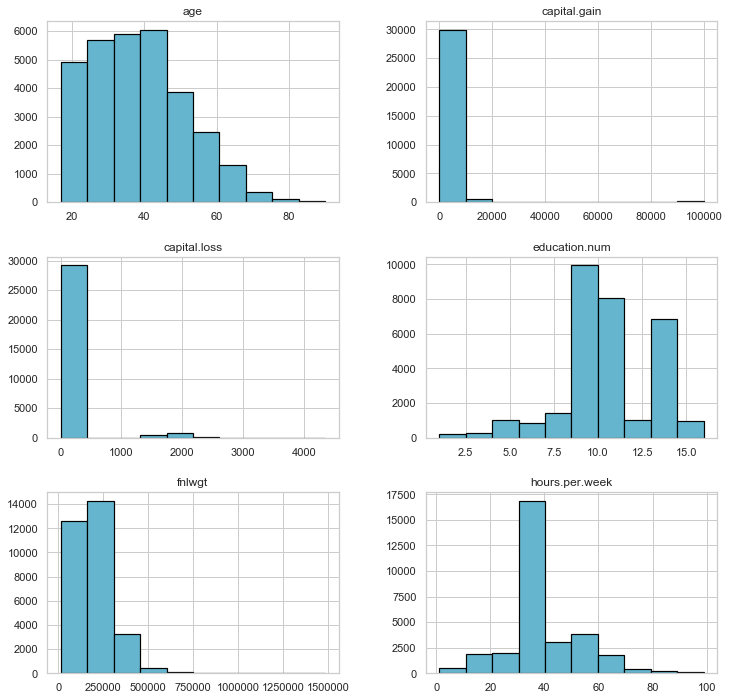

In [25]:
distribution = df.hist(edgecolor = 'black', linewidth = 1.2, color = 'c')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()


In [26]:
print (df['hours.per.week'].median())
print (df['hours.per.week'].mean())

40.0
40.95275949697009


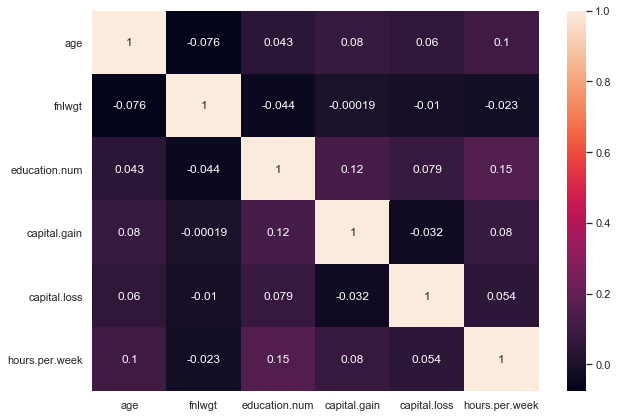

In [27]:
#Matrice de corrélation
plt.rcParams['figure.figsize'] = [10,7]
sns.heatmap(df.corr(), annot = True);

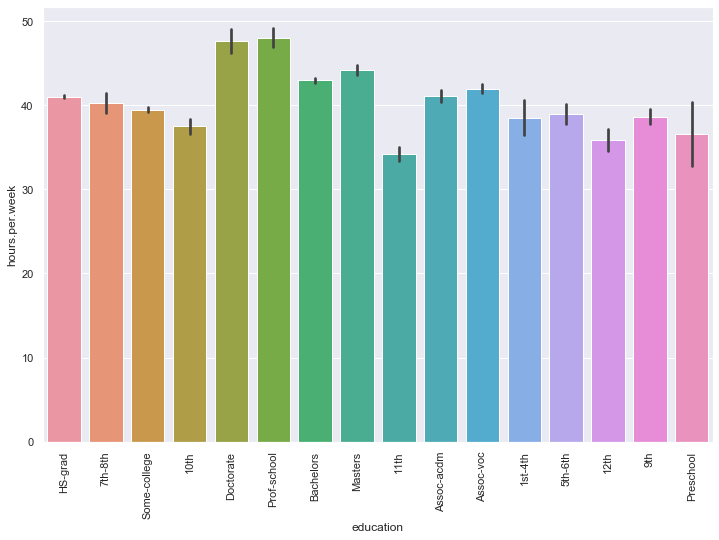

In [28]:
sns.set(rc={'figure.figsize':(12,8)})
sns_grad = sns.barplot(x = df['education'], y = df['hours.per.week'], data = df)
plt.setp(sns_grad.get_xticklabels(), rotation=90);

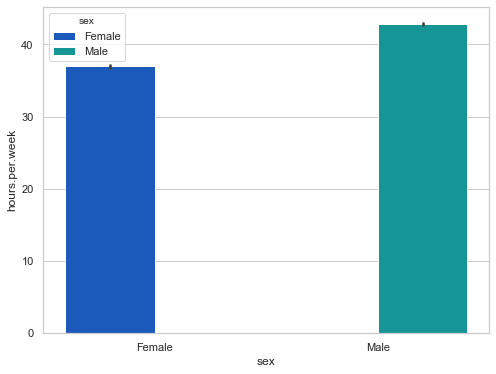

In [29]:
sns.set(style = 'whitegrid', rc={'figure.figsize':(8,6)})
sns.barplot(x = df['sex'], y = df['hours.per.week'], data = df,
            estimator = mean, hue = 'sex', palette = 'winter');

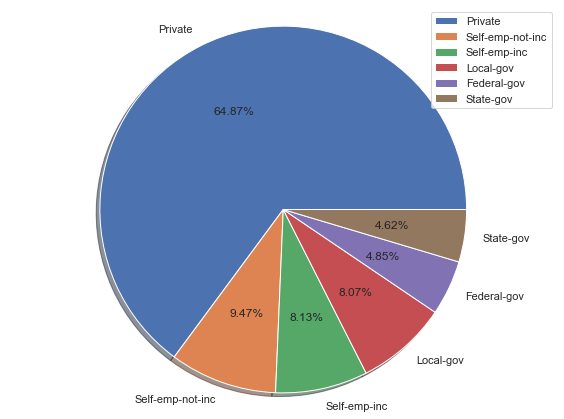

In [30]:
df_ = df.loc[df['income'] == '>50K',['workclass']]
workclass_types = df_['workclass'].value_counts()
labels = list(workclass_types.index)
aggregate = list(workclass_types)
plt.pie(aggregate, labels = labels, autopct='%1.2f%%', shadow=True)
plt.legend(labels, loc = 'best')
plt.axis('equal')
plt.tight_layout()
plt.show()

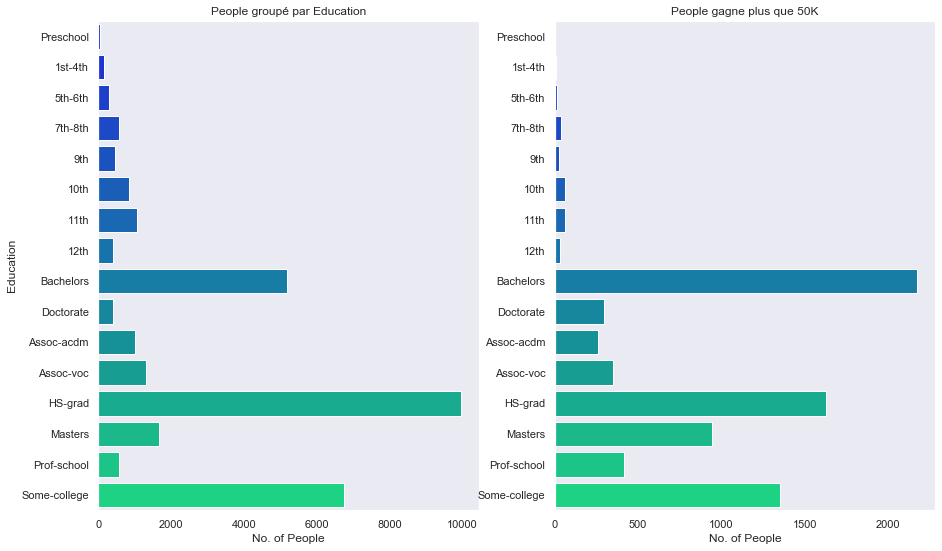

In [31]:
education_taille = df.groupby('education').size()
revenu = df.loc[df['income'] == '>50K', ['education']].groupby('education').size()

sns.set(style = 'dark')
plt.rcParams['figure.figsize'] = [15, 9]
fig, ax = plt.subplots(1,2)

ax[0].set_ylabel("Education")
ax[0].set_xlabel("No. of People")
ax[1].set_xlabel("No. of People")
ax[0].title.set_text("People groupé par Education")
ax[1].title.set_text("People gagne plus que 50K")
sns1 = sns.barplot(x = list(education_taille), y = list(education_taille.index), palette = 'winter',
                       order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'Bachelors', 'Doctorate',
                                'Assoc-acdm', 'Assoc-voc', 'HS-grad', 'Masters', 'Prof-school', 'Some-college'], ax = ax[0])
sns2 = sns.barplot(x = list(revenu), y = list(revenu.index), palette = 'winter',
                       order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'Bachelors', 'Doctorate',
                                'Assoc-acdm', 'Assoc-voc', 'HS-grad', 'Masters', 'Prof-school', 'Some-college'], ax = ax[1])

In [32]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [33]:
df['occupation'].unique()

array(['Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [34]:
df1 = df[df['native.country'] != '?']
nm = df1.loc[df1['income'] == '>50K',['native.country']].groupby('native.country').size()
nl = df1.loc[df1['income'] == '<=50K',['native.country']].groupby('native.country').size()
im= list(nm.index)
il= list(nl.index)
print(im)
print(len(im))
print(il)
print(len(il))


['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England', 'France', 'Germany', 'Greece', 'Guatemala', 'Haiti', 'Honduras', 'Hong', 'Hungary', 'India', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam', 'Yugoslavia']
39
['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England', 'France', 'Germany', 'Greece', 'Guatemala', 'Haiti', 'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary', 'India', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam', 'Yugoslavia']
41


In [35]:
[country for country in il if country not in im]

['Holand-Netherlands', 'Outlying-US(Guam-USVI-etc)']

In [36]:
df3 = pd.DataFrame({'Countries' : im, '>50K' : list(nm) })
df4 = pd.DataFrame({'Countries' : il, '<=50K' : list(nl) })
df3.loc[40] = 'Holand-Netherlands', 0
df3.loc[41] = 'Outlying-US(Guam-USVI-etc)', 0
df3

,Countries,>50K
0,Cambodia,7
1,Canada,36
2,China,20
3,Columbia,2
4,Cuba,25
5,Dominican-Republic,2
6,Ecuador,4
7,El-Salvador,9
8,England,30
9,France,12


In [37]:
df5 = pd.merge(df4, df3, on = 'Countries')

df5

,Countries,<=50K,>50K
0,Cambodia,11,7
1,Canada,71,36
2,China,48,20
3,Columbia,54,2
4,Cuba,67,25
5,Dominican-Republic,65,2
6,Ecuador,23,4
7,El-Salvador,91,9
8,England,56,30
9,France,15,12


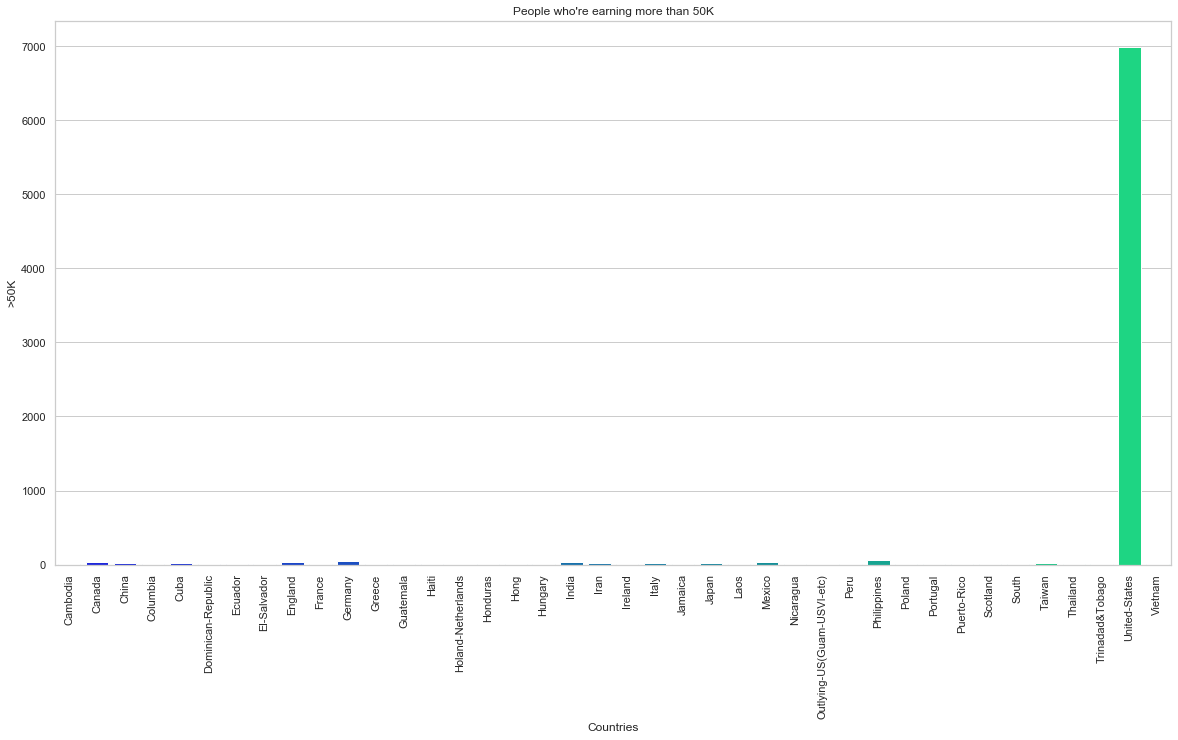

In [38]:
sns.set(style = 'whitegrid')
plt.rcParams['figure.figsize'] = [20,10]
df5 = df5.drop([40])
sns_ = sns.barplot(x = df5['Countries'], y = df5['>50K'], data = df5, palette = 'winter')
sns_.title.set_text("People who're earning more than 50K")

plt.setp(sns_.get_xticklabels(), rotation = 90);


### Prepocessing

In [39]:
df10 = df.copy()

df10 = df10.reset_index(drop = True)
df10.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [40]:
df10.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,30694.000000,3.069400e+04,30694.000000,30694.000000,30694.000000,30694.000000
mean,38.447612,1.898482e+05,10.131557,1106.901903,88.979735,40.952759
std,13.115154,1.054651e+05,2.561280,7500.730406,405.808149,11.984367
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178285e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.785135e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.372938e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [41]:
df10 = df10[df10.occupation != '?']

print (df10['occupation'].value_counts())

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64


In [42]:
df10.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [43]:
df10['income'] = df10['income'].map({'<=50K':0, '>50K':1})
df10['income'].value_counts()

0    23046
1     7648
Name: income, dtype: int64

In [44]:
from sklearn.preprocessing import LabelEncoder

features_catégorie = list(df10.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(features_catégorie):
    label_encoder_feat[feature] = LabelEncoder()
    df10[feature] = label_encoder_feat[feature].fit_transform(df10[feature])

df10.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,2,132870,11,9,6,3,1,4,0,0,4356,18,39,0
1,54,2,140359,5,4,0,6,4,4,0,0,3900,40,39,0
2,41,2,264663,15,10,5,9,3,4,0,0,3900,40,39,0
3,34,2,216864,11,9,0,7,4,4,0,0,3770,45,39,0
4,38,2,150601,0,6,5,0,4,4,1,0,3770,40,39,0


In [48]:
from sklearn.utils import shuffle
df10 = shuffle(df10)

from sklearn.model_selection import train_test_split
features_ = df10.drop(columns = ['income', 'education.num'])
target = df10['income']
X_train, X_test, y_train, y_test = train_test_split(features_, target, test_size = 0.3,random_state = 0)

print ("Train dataset taille : ", X_train.shape)
print ("Test dataset taille : ", X_test.shape)


Train dataset taille :  (21485, 13)
Test dataset taille :  (9209, 13)


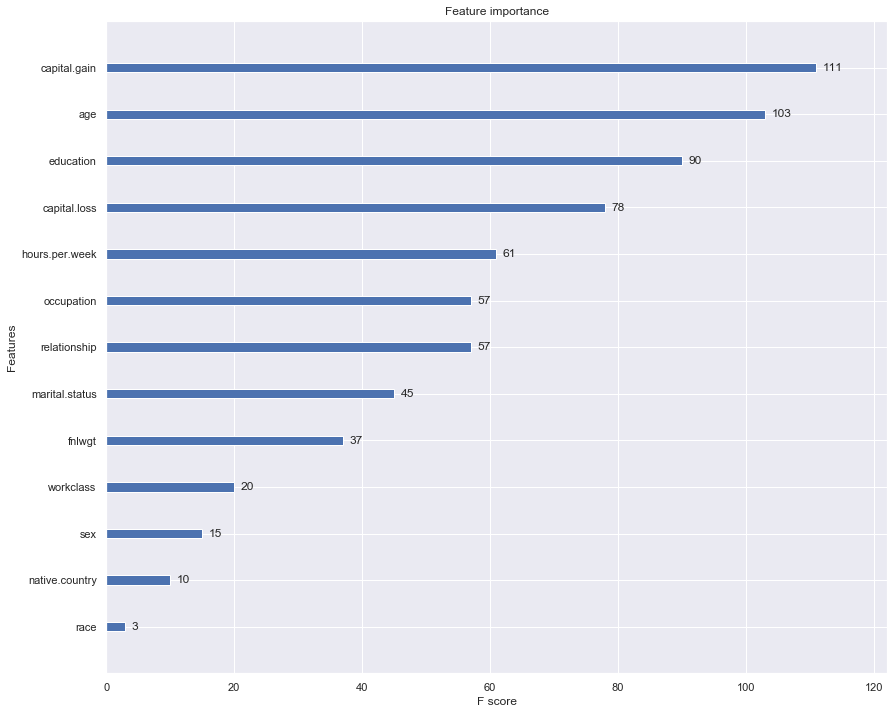

In [50]:
from xgboost import XGBClassifier
from xgboost import plot_importance
model = XGBClassifier()
model_importance = model.fit(X_train, y_train)
plt.rcParams['figure.figsize'] = [14,12]
sns.set(style = 'darkgrid')
plot_importance(model_importance);






### Model

In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
import warnings; warnings.simplefilter('ignore')

### Model 1

In [53]:
logistic = LogisticRegression(C = 0.5, max_iter = 500)
model_1 = logistic.fit(X_train, y_train)
pred_1 = model_1.predict(X_test)

print ("Accuracy du model 1 : ",accuracy_score(y_test, pred_1))
print ("F1 score du model 1 : ", f1_score(y_test, pred_1, average = 'binary'))

Accuracy du model 1 :  0.8024758388532957
F1 score du model 1 :  0.39628277464321277


### Model 2

In [54]:
R_forest = RandomForestClassifier(n_estimators = 200)
model_2 = R_forest.fit(X_train, y_train)
pred_2 = model_2.predict(X_test)

print ("Accuracy du model 2 : ",accuracy_score(y_test, pred_2))
print ("F1 score du model 2 : ", f1_score(y_test, pred_2, average = 'binary'))

Accuracy du model 2 :  0.8554674774676947
F1 score du model 2 :  0.6727317432997294


### Model 3

In [55]:
boosted_gd = XGBClassifier(learning_rate = 0.35, n_estimator = 200)
model_3 = boosted_gd.fit(X_train, y_train)
pred_3 = model_3.predict(X_test)
print ("Accuracy du model 3 : ",accuracy_score(y_test, pred_3))
print ("F1 score du model 3 : ", f1_score(y_test, pred_3, average = 'binary'))

Accuracy du model 3 :  0.8722988380931698
F1 score du model 3 :  0.7091988130563799


In [58]:
list_pred = [pred_1, pred_2, pred_3]
model_names = ["Logistic Regression", "Random Forest Classifier", "Boosted Gradient Descent"]

for i, predictions in enumerate(list_pred) :
    print ("Classification Report de ", model_names[i])
    print ()
    print (classification_report(y_test, predictions, target_names = ["<=50K", ">50K"]))

Classification Report de  Logistic Regression

              precision    recall  f1-score   support

       <=50K       0.81      0.97      0.88      7010
        >50K       0.73      0.27      0.40      2199

    accuracy                           0.80      9209
   macro avg       0.77      0.62      0.64      9209
weighted avg       0.79      0.80      0.77      9209

Classification Report de  Random Forest Classifier

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7010
        >50K       0.73      0.62      0.67      2199

    accuracy                           0.86      9209
   macro avg       0.81      0.78      0.79      9209
weighted avg       0.85      0.86      0.85      9209

Classification Report de  Boosted Gradient Descent

              precision    recall  f1-score   support

       <=50K       0.90      0.94      0.92      7010
        >50K       0.78      0.65      0.71      2199

    accuracy                   

In [60]:
for i, pred in enumerate(list_pred) :
    print ("La Matrice de Confusion : ", model_names[i])
    print (pd.DataFrame(confusion_matrix(y_test, pred)))
    print ()

La Matrice de Confusion :  Logistic Regression
      0    1
0  6793  217
1  1602  597

La Matrice de Confusion :  Random Forest Classifier
      0     1
0  6510   500
1   831  1368

La Matrice de Confusion :  Boosted Gradient Descent
      0     1
0  6599   411
1   765  1434



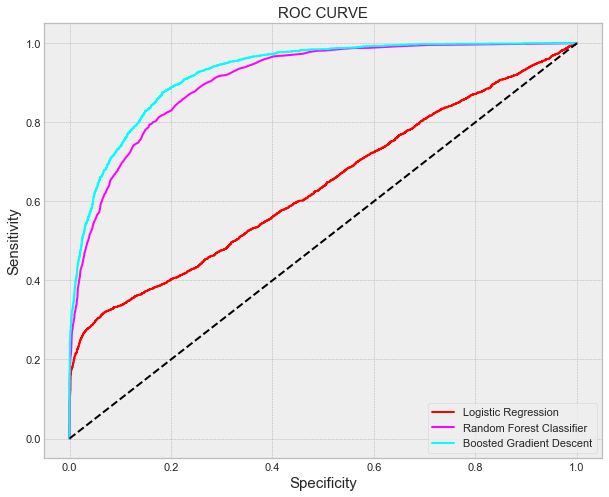

In [61]:
from sklearn.metrics import roc_auc_score, roc_curve
models = [model_1, model_2, model_3]
plt.rcParams['figure.figsize'] = [10,8]
plt.style.use("bmh")

color = ['red', 'fuchsia', 'cyan']
plt.title("ROC CURVE", fontsize = 15)
plt.xlabel("Specificity", fontsize = 15)
plt.ylabel("Sensitivity", fontsize = 15)
i = 1

for i, model in enumerate(models) :
    prob = model.predict_proba(X_test)
    prob_positive = prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test, prob_positive)
    plt.plot(fpr, tpr, color = color[i])
    plt.gca().legend(model_names, loc = 'lower right', frameon = True)

plt.plot([0,1],[0,1], linestyle = '--', color = 'black')
plt.show()